In [303]:
import random
import numpy as np
import pandas as pd
import sklearn.metrics 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
print("Libraries imported.")

Libraries imported.


# Reading Data

Reading the data from CSV file using pandas:

### `train_set.csv:`

- UAV_i_track: clockwise angle from north between the ith UAV
and its target (0, 2π):
- UAV_i_x, UAV_i_y: position components of the ith UAV in
meters
- UAV_i_vx, UAV_i_vy (dx, dy): speed components of the ith UAV
in meters/seconds
- UAV_i_target_x, UAV_i_target_y: position components of the
ith UAV target in meters

In [260]:
DB = pd.read_csv('train_set.csv')
dataset_name = "UAV_Conflict"
X_all = np.asarray(DB[['UAV_1_track', 'UAV_1_x', 'UAV_1_y', 'UAV_1_vx', 'UAV_1_vy', 'UAV_1_target_x', 'UAV_1_target_y',
         'UAV_2_track', 'UAV_2_x', 'UAV_2_y', 'UAV_2_vx', 'UAV_2_vy', 'UAV_2_target_x', 'UAV_2_target_y',
         'UAV_3_track', 'UAV_3_x', 'UAV_3_y', 'UAV_3_vx', 'UAV_3_vy', 'UAV_3_target_x', 'UAV_3_target_y',
         'UAV_4_track', 'UAV_4_x', 'UAV_4_y', 'UAV_4_vx', 'UAV_4_vy', 'UAV_4_target_x', 'UAV_4_target_y',
         'UAV_5_track', 'UAV_5_x', 'UAV_5_y', 'UAV_5_vx', 'UAV_5_vy', 'UAV_5_target_x', 'UAV_5_target_y']])
y_all = np.asarray(DB['min_CPA'])
print('File loaded:'  )
print(DB.shape)
DB.head()


File loaded:
(1000, 37)


,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y,num_collisions,min_CPA
0,0.027068,-62300.591721,-59305.682068,6.705684,247.671970,-59569.480482,41566.912694,1.474570,-56681.475086,-5314.787648,...,42576.874951,1.607547,-80967.561432,37684.582412,213.175442,-7.837820,41342.567045,33187.606489,3,1673.734894
1,4.023101,-17220.612570,47439.586909,-167.653031,-138.169553,-98139.258988,-19248.698541,2.614451,33573.808959,51374.559396,...,-35144.579226,4.315806,13285.311651,-41245.545752,-196.978758,-82.489078,-2806.112817,-47984.174724,0,51230.547792
2,1.841994,-19900.350438,59030.833595,208.716697,-58.033328,70435.277561,33913.163359,2.492568,-53314.291038,-15227.414024,...,-23468.668544,0.954796,21679.563309,-34471.154448,208.580726,147.651921,78980.509691,6091.533217,0,18668.177773
3,3.621532,-48565.126583,-11986.418570,-113.516305,-218.076997,-60503.694386,-34921.687695,4.941877,66081.722767,-13048.091807,...,42374.513704,4.056282,-31560.842269,36234.825255,-184.415246,-141.978597,-61666.394619,13057.001319,0,10159.624794
4,2.318417,52665.281329,-47498.516869,177.796999,-164.846698,63901.656021,-57916.461362,5.084740,-8541.183540,3543.309665,...,26128.828499,2.515598,18186.463747,79639.001255,133.007662,-183.966901,63306.445359,17232.196700,0,22110.623878


# Data Analysis

In [168]:
DB.describe()

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y,num_collisions,min_CPA
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.097107,-2251.510684,1937.128245,2.137590,-5.173397,-1362.761576,-1791.082117,3.136845,206.614955,-2091.970696,...,799.891631,3.155160,-2977.318847,359.452143,6.569011,-2.194172,526.780918,-325.666762,0.627000,13619.447531
std,1.789494,37025.251014,38166.298168,163.037269,165.524438,51957.135487,51145.128388,1.779644,39028.608668,39866.312802,...,52222.755233,1.786851,45914.943277,45433.633947,169.514958,158.217027,52165.679801,50130.146901,0.801569,11049.082699
min,0.004634,-91980.543846,-89013.624737,-251.349727,-255.480050,-100195.359570,-101673.109826,0.005734,-88613.333773,-95086.350672,...,-104075.617505,0.006963,-101552.794782,-97000.671501,-255.013797,-255.074619,-101259.005903,-100263.093300,0.000000,194.154500
25%,1.536698,-30607.760984,-25692.763510,-157.336134,-169.216320,-47639.342284,-46488.248899,1.644041,-28933.246680,-34028.475462,...,-46166.898697,1.664117,-40994.978684,-36710.592779,-171.797233,-152.660354,-47298.128238,-44614.828274,0.000000,4965.337543
50%,3.112044,-3679.212885,2543.915194,4.761970,-9.766248,1484.974660,-3198.281291,3.164640,1584.409513,-2541.706919,...,1412.592659,3.021063,-2694.989204,243.092652,10.301821,-8.589739,898.293621,630.881754,0.000000,10374.395945
75%,4.580826,26615.537869,30922.483794,163.810226,164.608392,42534.699919,42278.208442,4.557317,29147.594341,28905.394588,...,47953.525536,4.751152,33070.248117,38283.915435,181.120813,148.066194,47024.984977,44691.998223,1.000000,19046.439061
max,6.279883,84893.473665,94944.457078,255.815648,254.835854,100556.165009,96788.680559,6.282592,94757.025879,90816.601820,...,98689.193066,6.283185,94385.039549,97135.166274,256.140115,256.876492,100097.215587,92016.282665,4.000000,57899.814184


In [169]:
DB['min_CPA'].describe()

count     1000.000000
mean     13619.447531
std      11049.082699
min        194.154500
25%       4965.337543
50%      10374.395945
75%      19046.439061
max      57899.814184
Name: min_CPA, dtype: float64

# Summary of the dataset:

In [261]:
print('Number of samples: %d' %DB.shape[0])
print('Target range: [%.1f, %.1f]' %(min(DB.min_CPA),max(DB.min_CPA)))

Number of samples: 1000
Target range: [194.2, 57899.8]


# Normalizing the dataset:

In [262]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
X_all = preprocessing.minmax_scale(X_all)
y_all = preprocessing.minmax_scale(y_all)

# Train/Test dataset

We split our dataset into train and test set:

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33, random_state=117)

print("Size of training set: %d" %X_train.shape[0])
print("Size of test set: %d" %X_test.shape[0])


Size of training set: 670
Size of test set: 330


# Modeling 

In [332]:
model_type = "poly_svm"  # "linear_regression", "DecisionTreeRegressor", "KNeighborsRegressor", "linear_svm", "poly_svm"

if model_type == "linear_regression":
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    
elif model_type == "DecisionTreeRegressor":   
    model = DecisionTreeRegressor(random_state=0)
    model.fit(X_train, y_train)  
    
elif model_type == "KNeighborsRegressor":    
    model = KNeighborsRegressor(n_neighbors=7, weights='distance')
    model.fit(X_train, y_train)    
    
elif model_type == "linear_svm":
    model = SVR(kernel='linear', C=0.001)
    model.fit(X_train, y_train)

elif model_type == "poly_svm":
    model = SVR(kernel='rbf',degree=1, C=0.2)
    model.fit(X_train, y_train)




# Prediction

In [333]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# R2 regression score: 1 is perfect prediction
print('Regression score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.03
Regression score: 0.05


# Plotting the outputs

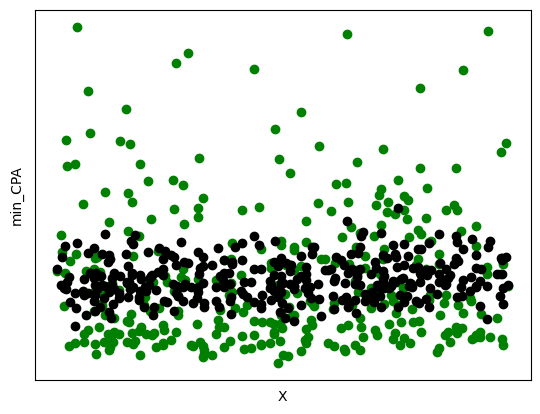

In [335]:
plt.scatter(X_test[:,0], y_test,  color='green')
plt.scatter(X_test[:,0], y_pred, color='black')
plt.xlabel("X")
plt.ylabel("min_CPA")
plt.xticks(())
plt.yticks(())
plt.show()

In [331]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
grid_search_regression = GridSearchCV(model,
                           {
                              'C':np.arange(0.1,2,0.1),                            
                            'kernel': ('linear', 'rbf','poly','sigmoid'),
                            #If the kernel is poly (above line commented), you can also choose the best degree
                            'degree': np.arange(1,4,1),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
print("\n\nGrid Search for Regression\n\n")
print(grid_search_regression.fit(X_train,y_train))
#Best parameters for the regressor
print("Best regression hyper-parameters: %r" %grid_search_regression.best_params_)
print("Best R2 score: %.2f" %grid_search_regression.best_score_)



Grid Search for Regression


Fitting 5 folds for each of 228 candidates, totalling 1140 fits
GridSearchCV(cv=5, estimator=SVR(C=0.2, degree=1), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'degree': array([1, 2, 3]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='r2', verbose=1)
Best regression hyper-parameters: {'C': 0.2, 'degree': 1, 'kernel': 'rbf'}
Best R2 score: 0.00
